In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import PIL
import os

In [2]:
os.getcwd()

'/Users/ahmed/Desktop/Kaggle/IRM_tumeur'

In [3]:
os.listdir('/Users/ahmed/Desktop/Kaggle/IRM_tumeur')

file_list = []
label_list = []
for root,dirs,files in os.walk('/Users/ahmed/Desktop/Kaggle/IRM_tumeur'):
    for file in files:
        if '.jpg' in file:
            
            val = root.split('/')
            
            if 'no' in val:
                label_list.append(0)
            else:
                label_list.append(1)
            
            file_list.append(os.path.join(root,file))
len(file_list)

342

In [4]:
img = PIL.Image.open('/Users/ahmed/Desktop/Kaggle/IRM_tumeur/no/7 no.jpg')
#img = img.convert('L')
np.array(img).shape


(417, 428, 3)

In [5]:
minimum = 1000
compteur = 0
for image in file_list:
    img = PIL.Image.open(image)
    shape = np.array(img).shape
    if min(shape[0],shape[1]) < minimum:
        minimum = min(shape[0],shape[1])
        
print(minimum)

150


In [6]:
df = []
for image in file_list:
    img = PIL.Image.open(image)
    img = img.resize((70,70))
    img = img.convert('L')
    df.append(np.array(img))

In [7]:
data = np.array(df)

In [8]:
data.shape

(342, 70, 70)

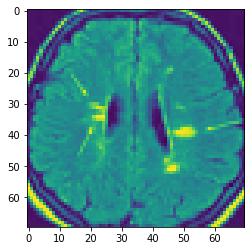

In [9]:
plt.imshow(data[0][0:70].reshape(70,70))

In [10]:
x,y,z = data.shape
data_r = data.reshape(x,y*z)
data_r = pd.DataFrame(data_r)

In [11]:
data_r.head()

,0,1,2,3,4,5,6,7,8,9,...,4890,4891,4892,4893,4894,4895,4896,4897,4898,4899
0,31,31,31,30,30,31,31,31,30,30,...,252,212,104,38,28,31,31,31,31,30
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,2,2,...,1,1,2,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [12]:
data_r['Label'] = label_list

In [13]:
data_r.head()

,0,1,2,3,4,5,6,7,8,9,...,4891,4892,4893,4894,4895,4896,4897,4898,4899,Label
0,31,31,31,30,30,31,31,31,30,30,...,212,104,38,28,31,31,31,31,30,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,2,2,...,1,2,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0


In [14]:
data_r['Label'].value_counts()

1    172
0    170
Name: Label, dtype: int64

In [15]:
X = data_r.drop(['Label'],axis=1)
y = data_r['Label']

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [17]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=6)

In [18]:
model = make_pipeline(StandardScaler(),MLPClassifier())
model.fit(X_train , y_train)
model.score(X_test,y_test)

0.9710144927536232

In [19]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,X_train,y_train,cv=3).mean()

0.8864468864468864

In [20]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

In [21]:
pred = model.predict(X_test)

In [22]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        33
           1       0.95      1.00      0.97        36

    accuracy                           0.97        69
   macro avg       0.97      0.97      0.97        69
weighted avg       0.97      0.97      0.97        69



In [23]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,pred)

0.9696969696969697

In [28]:
from sklearn.model_selection import StratifiedKFold
accuracy = []

skf = StratifiedKFold(n_splits=10,random_state=None)
skf.get_n_splits(X,y)

for train_index,test_index in skf.split(X,y):
    X1_train,X1_test = X.iloc[train_index],X.iloc[test_index]
    y1_train,y1_test = y.iloc[train_index],y.iloc[test_index]
    
model.fit(X1_train,y1_train)
model.score(X_test,y_test)

1.0

In [29]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,X1_train,y1_train,cv=3).mean()

0.9741100323624595

In [30]:
pred = model.predict(X1_test)

In [31]:
print(classification_report(y1_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        17

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34

